In [1]:
import numpy as np
import pandas as pd

In [3]:
#fill upload
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [28]:
df=pd.read_csv('spam.csv', encoding='latin-1')



In [30]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [31]:
df.shape

(5572, 5)

# Data Cleaning

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [33]:
#Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [34]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
#rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
#label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [37]:
df['target'] = encoder.fit_transform(df['target'])  #ham = 0   spam = 1

In [38]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [40]:
df.duplicated().sum()

np.int64(403)

In [41]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.shape

(5169, 2)

# EDA

In [44]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
df['target'].value_counts()  # hear data is imbalanced

,count
target,
0,4516
1,653


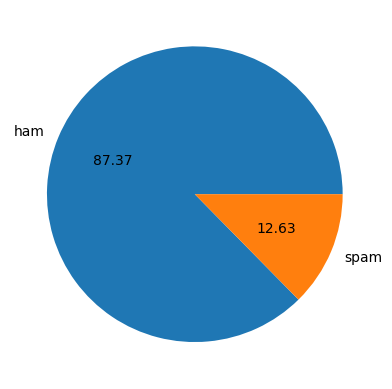

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [46]:
import nltk

In [47]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [48]:
# num_characters
df['num_characters']=df['text'].apply(len)

/tmp/ipython-input-48-399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [49]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-50-3149482763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [51]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [52]:
#num_Sentences
df['num_Sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-52-3450283082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_Sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [53]:
df.head()

,target,text,num_characters,num_words,num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [54]:
df[['num_characters','num_words','num_Sentences']].describe()

,num_characters,num_words,num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
#ham
df[df['target']==0][['num_characters','num_words','num_Sentences']].describe()

,num_characters,num_words,num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#spam
df[df['target']==1][['num_characters','num_words','num_Sentences']].describe()

,num_characters,num_words,num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

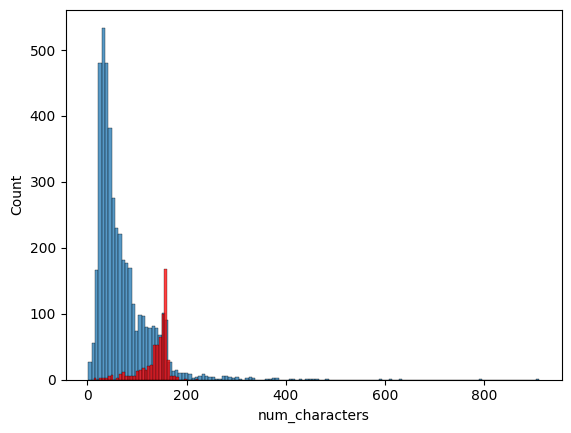

In [63]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

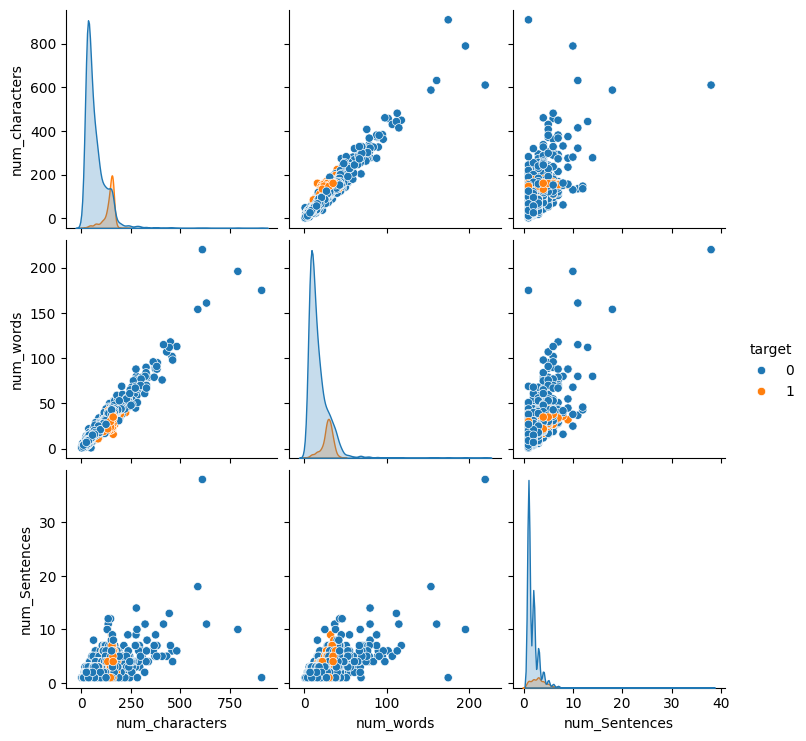

In [64]:
sns.pairplot(df,hue='target')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_Sentences   5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


#Data preprocessing
## Lower case
## Tockenization
## Removing Special character
## Removing Stop wordes and punctuation
## Steming

In [67]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # punkt is also required for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join (y)

In [75]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [70]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [71]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [72]:
import string
string. punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loved')

'love'

In [76]:
df['transformed_text']=df['text'].apply(transform_text)


/tmp/ipython-input-76-1118262064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [77]:
df.head()

,target,text,num_characters,num_words,num_Sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Model Building

In [78]:
#convert text to number(vectorization)
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [79]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [80]:
X.shape

(5169, 6708)

In [82]:
y=df['target'].values

In [83]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
lg=LogisticRegression()

In [87]:
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9787234042553191
[[895   1]
 [ 21 117]]
0.9915254237288136


In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [89]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9574468085106383
[[883  13]
 [ 31 107]]
0.8916666666666667


In [90]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [91]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [92]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()


In [93]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:


!pip install -q gradio

import gradio as gr

def classify_email(email):
  transformed_email = transform_text(email)
  vectorized_email = cv.transform([transformed_email]).toarray()
  prediction = lg.predict(vectorized_email)[0]
  return 'Spam' if prediction == 1 else 'Not Spam'

iface = gr.Interface(fn=classify_email, inputs="text", outputs="text", title="Email Spam Classifier")
iface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://655d41eeceb06dd2ab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
'''not spam
I am free today, lets go out for a movie. what do you say?
Don’t forget to submit the report by tomorrow

In [ ]:
'''spam
congratulation you won 1000 call on this number to get your prize
"Congratulations! You've won a $1000 gift card. Click here to claim now
